In [60]:
from mcmr_crosstalk_comp_basis import MCMR_Crosstalk_Comp_Basis_Experiment
import numpy as np

expall = MCMR_Crosstalk_Comp_Basis_Experiment.load('exp_MCMR_Crosstalk_comp_basis_q[0, 2, 4, 6, 8, 10, 12, 14]_2025-10-21 18:00:38.614950.p')
exp0 = MCMR_Crosstalk_Comp_Basis_Experiment.load('exp_MCMR_Crosstalk_comp_basis_q[0]_2025-10-21 17:39:16.506992.p')
exp2 = MCMR_Crosstalk_Comp_Basis_Experiment.load('exp_MCMR_Crosstalk_comp_basis_q[2]_2025-10-27 15:12:49.099181.p')
exp4 = MCMR_Crosstalk_Comp_Basis_Experiment.load('exp_MCMR_Crosstalk_comp_basis_q[4]_2025-10-27 15:14:15.416934.p')
exp6 = MCMR_Crosstalk_Comp_Basis_Experiment.load('exp_MCMR_Crosstalk_comp_basis_q[6]_2025-10-27 15:15:22.957459.p')
exp8 = MCMR_Crosstalk_Comp_Basis_Experiment.load('exp_MCMR_Crosstalk_comp_basis_q[8]_2025-10-29 19:45:06.557214.p')
# exps = [expall, exp0, exp2, exp4, exp6]
exps = [expall, exp0, exp2, exp4, exp6, exp8]

In [15]:
measured_qubits = [{i: [] for i in range(4)} for j in range(len(exps))]
measured_qubits

[{0: [], 1: [], 2: [], 3: []},
 {0: [], 1: [], 2: [], 3: []},
 {0: [], 1: [], 2: [], 3: []},
 {0: [], 1: [], 2: [], 3: []}]

## All qubits

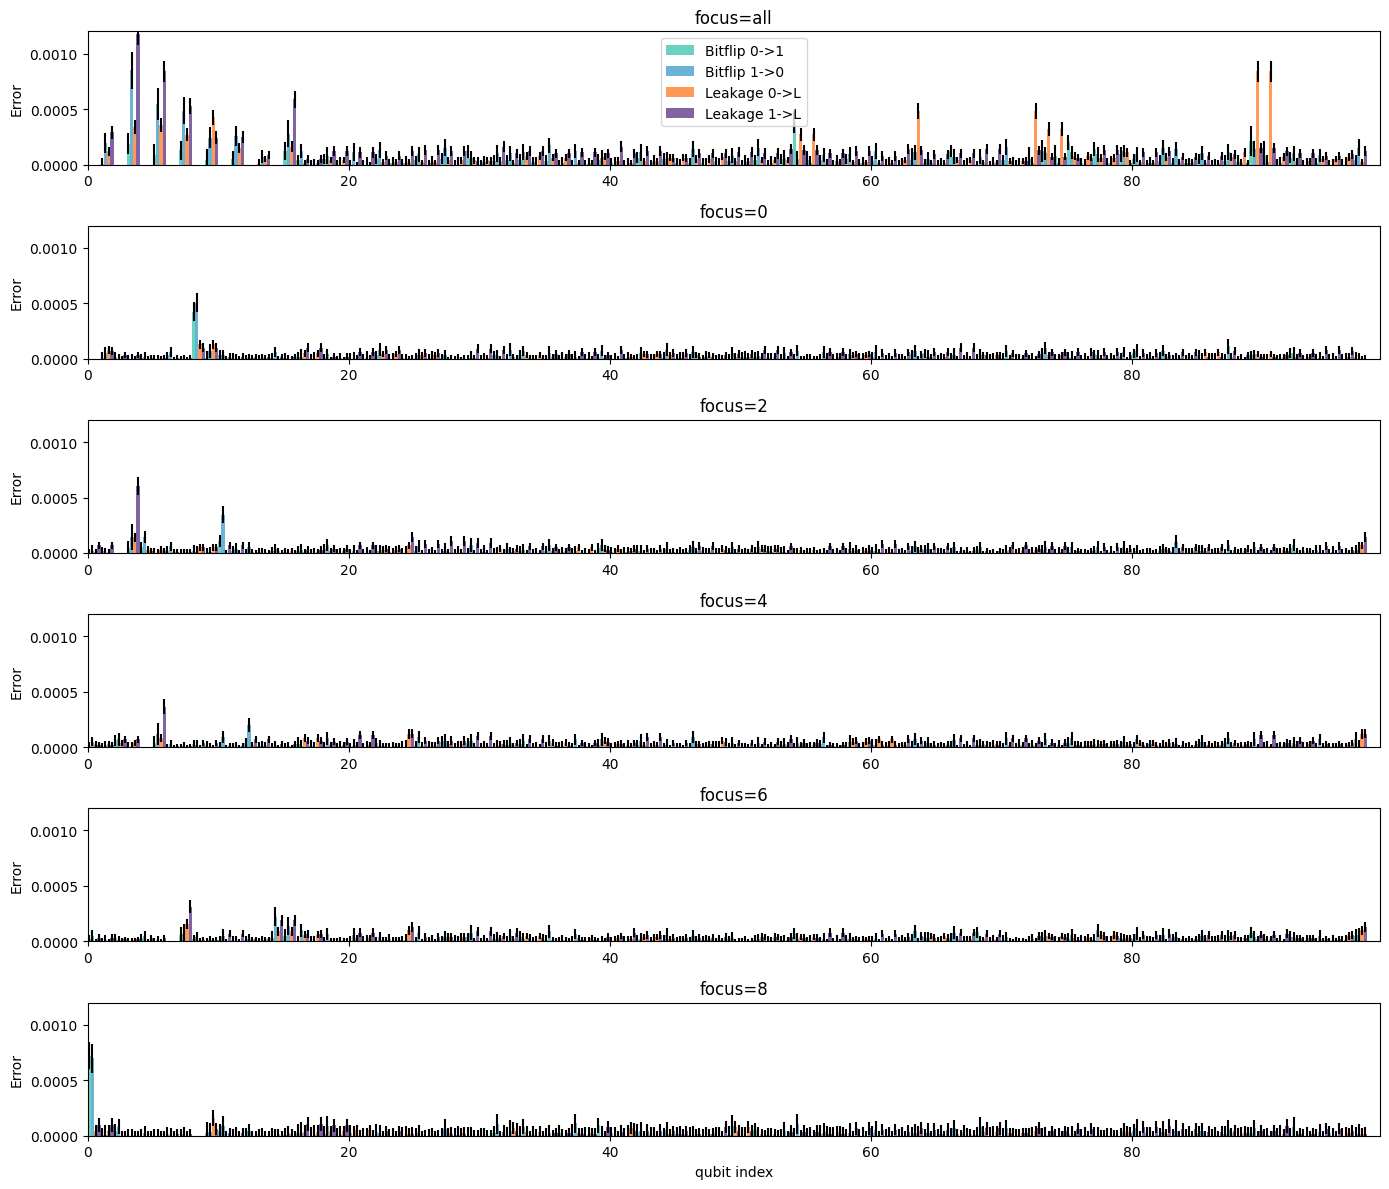

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import string

scale = 1e-4
shift = 0.07

qtm_hex = [
    '#E1F6F2', '#A5E5D7', '#6AD3BE', '#30A08E', '#1D605B',
    '#E6E0EC', '#B3A2C7', '#8064A2', '#604A7B', '#403152',
    '#FCDFE4', '#F59EAF', '#E75D72', '#BB4658', '#7C3349',
    '#FFEBDD', '#FFC29A', '#FF9A56', '#E5803C', '#92542A',
    '#c3e1ee', '#96cae1', '#69B3D4', '#548faa', '#4a7d94',
    '#fff2b3', '#ffea81', "#FED402", '#cbaa02', '#b29401',
    '#F2F2F2', '#CACACA', '#7F7F7F', '#2B2B2B', '#000000',
]

custom_colors = ['#6AD3BE', '#69B3D4', '#FF9A56', '#8064A2', '#E75D72', '#FED402', '#7F7F7F'] # Red, Yellow, Blue

measured_qubits = [{i: [] for i in range(4)} for j in range(len(exps))]
measured_qubits_std = [{i: [] for i in range(4)} for j in range(len(exps))]

for l, exp in enumerate(exps):
    for i in range(4):
        j1 = 0
        for j in range(98):
            if j in exp.probe_qubits:
                measured_qubits[l][i].append(exp.error_channels[i][j1])
                measured_qubits_std[l][i].append(exp.error_channels_stds[i][j1])
                j1 += 1
            else:
                measured_qubits[l][i].append(0)
                measured_qubits_std[l][i].append(0)


fig, ax = plt.subplots(len(exps), 1, figsize=(14, 12))
handles = []
for l in range(len(exps)):
    for i in range(4):
        handles.append(ax[l].bar(
            np.arange(98) + i/4,
            measured_qubits[l][i],
            yerr=measured_qubits_std[l][i],
            width=1/4,
            align='edge',
            color=custom_colors[i]
        ))
        ax[l].set_ylabel('Error')
        ax[l].set_xlim(0,99)

# for i in range(4):
#     ax[1].bar(
#         np.arange(98) + i/4,
#         np.array(measured_qubits2[i]),
#         yerr=measured_qubits2_std[i],
#         width=1/4,  
#         align='edge',
#         color=custom_colors[i]
#     )

ax[0].set_ylim(0, 12e-4)
ax[1].set_ylim(0, 12e-4)
ax[2].set_ylim(0, 12e-4)
ax[3].set_ylim(0, 12e-4)
ax[4].set_ylim(0, 12e-4)
ax[5].set_ylim(0, 12e-4)
ax[-1].set_xlabel('qubit index')
ax[0].set_title('focus=all')
ax[1].set_title('focus=0')
ax[2].set_title('focus=2')
ax[3].set_title('focus=4')
ax[4].set_title('focus=6')
ax[5].set_title('focus=8')
ax[0].legend(handles, ['Bitflip 0->1','Bitflip 1->0','Leakage 0->L','Leakage 1->L'])
fig.tight_layout()
fig.savefig('mcmr_crosstalk_all_qubits.pdf', format='pdf', bbox_inches='tight')

## Gate zone + ring avg

0 1.5582289563388732
1 0.4531700528188895
2 0.45639601733374613
3 0.49425010256304824
4 0.5042775317390515
5 0.4121532022819271


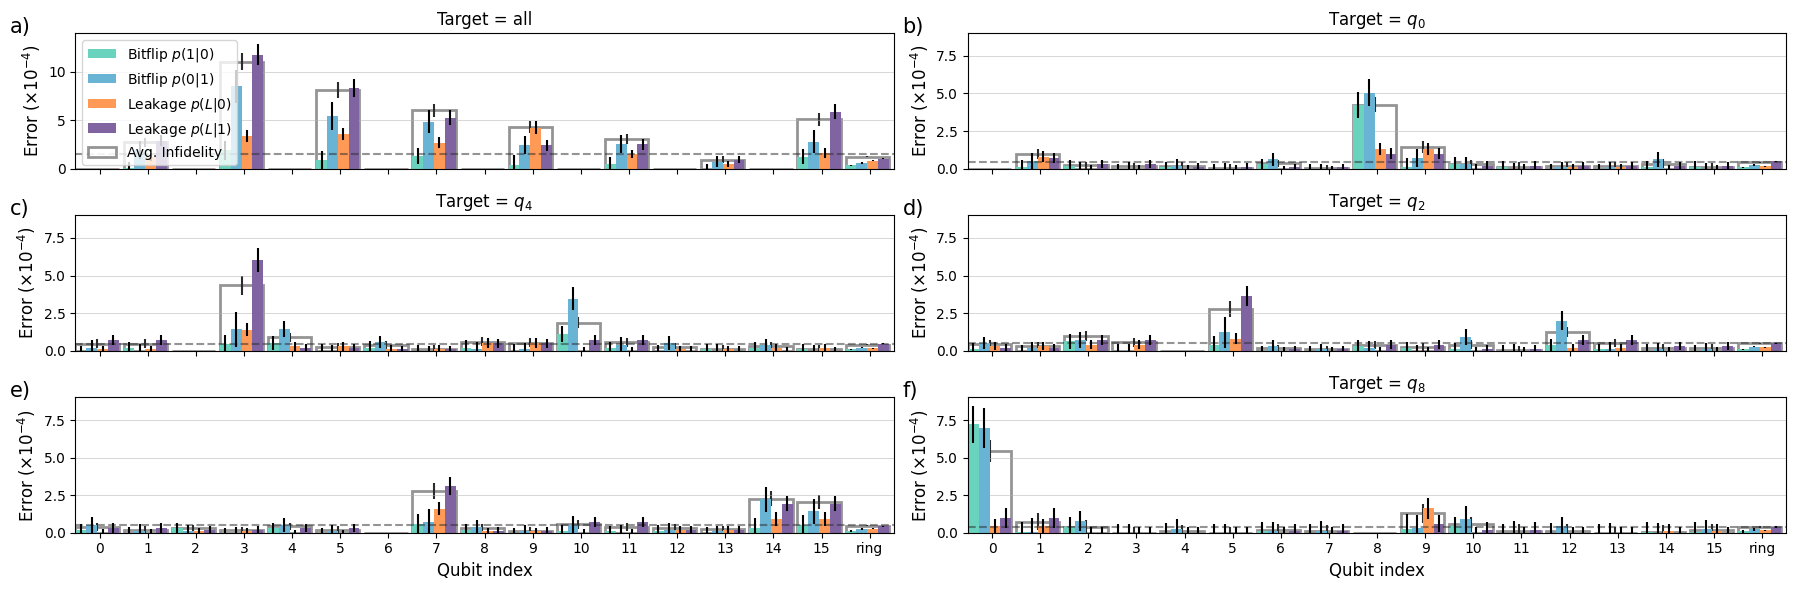

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import string
import matplotlib.gridspec as gridspec

scale = 1e-4
shift = 0.07

qtm_hex = [
    '#E1F6F2', '#A5E5D7', '#6AD3BE', '#30A08E', '#1D605B',
    '#E6E0EC', '#B3A2C7', '#8064A2', '#604A7B', '#403152',
    '#FCDFE4', '#F59EAF', '#E75D72', '#BB4658', '#7C3349',
    '#FFEBDD', '#FFC29A', '#FF9A56', '#E5803C', '#92542A',
    '#c3e1ee', '#96cae1', '#69B3D4', '#548faa', '#4a7d94',
    '#fff2b3', '#ffea81', "#FED402", '#cbaa02', '#b29401',
    '#F2F2F2', '#CACACA', '#7F7F7F', '#2B2B2B', '#000000',
]

custom_colors = ['#6AD3BE', '#69B3D4', '#FF9A56', '#8064A2', '#2B2B2B', '#FED402', '#7F7F7F'] # Red, Yellow, Blue

measured_qubits = [{i: [] for i in range(5)} for j in range(len(exps))]
measured_qubits_std = [{i: [] for i in range(5)} for j in range(len(exps))]
global_inf = np.zeros(len(exps))
row = [0,1,0,1,0,1]
col = [0,0,1,1,2,2]

for l, exp in enumerate(exps):
    for i in range(5):
        j1 = 0
        for j in range(98):
            if j in exp.probe_qubits:
                measured_qubits[l][i].append(exp.error_channels[i][j1]/scale)
                measured_qubits_std[l][i].append(exp.error_channels_stds[i][j1]/scale)
                j1 += 1
            else:
                measured_qubits[l][i].append(0)
                measured_qubits_std[l][i].append(0)

fig, ax = plt.subplots(3,2, figsize=(18, 6))
handles = []
for l in range(len(exps)):
    global_inf[l] = np.mean([(2*measured_qubits[l][0][j] + 2*measured_qubits[l][1][j] + 6*measured_qubits[l][4][j])/6 for j in range(98) if j not in exps[l].focus_qubits])
    print(l,global_inf[l])
    for i in range(4): # the error channels
        handles.append(ax[col[l]][row[l]].bar(
            np.arange(17) + i*0.9/4,
            [measured_qubits[l][i][j] for j in range(16)] 
                + [np.mean(measured_qubits[l][i][16:])],
            # yerr=[measured_qubits_std[l][i][j] for j in range(16)] + [np.mean(measured_qubits_std[l][i][16:])],
            yerr=[measured_qubits_std[l][i][j] for j in range(16)] 
                + [np.sqrt(sum([measured_qubits_std[l][i][k]**2 for k in range(16,98)]))/82],
            width=0.9/4,
            align='edge',
            color=custom_colors[i],
            zorder=2
        ))
    handles.append(ax[col[l]][row[l]].bar( # the average fidelity bars
    np.arange(0, 17) + 0.45, # the infidelity 
    (
        [(2*measured_qubits[l][0][j] + 2*measured_qubits[l][1][j] + 6*measured_qubits[l][4][j])/6 for j in range(0,16)] 
        + [np.mean([(2*measured_qubits[l][0][j] + 2*measured_qubits[l][1][j] + 6*measured_qubits[l][4][j])/6 for j in range(16,98)])]
    ),
    yerr=(
        [np.sqrt((2*measured_qubits_std[l][0][j])**2 +(2*measured_qubits_std[l][1][j])**2 
                        + (6*measured_qubits_std[l][4][j])**2)/6 for j in range(0,16)] 
        + [np.sqrt(sum(((2*measured_qubits_std[l][0][j])**2 +(2*measured_qubits_std[l][1][j])**2 
                        + (6*measured_qubits_std[l][4][j])**2)/36 for j in range(16,98)))/82]
    ),
    width=0.9,
    align='center',
    edgecolor=custom_colors[4],
    facecolor='white',
    zorder=1,
    linewidth=2,
    alpha=0.5,
    error_kw=dict(ecolor=custom_colors[4], capthick=5)

    ))
    ax[col[l]][row[l]].axhline( # the average zone infidelity (horizontal line)
    # np.mean([(2*measured_qubits[l][0][j] + 2*measured_qubits[l][1][j] + 6*measured_qubits[l][4][j])/6 for j in range(16) if measured_qubits[l][0][j] > 0]),
    global_inf[l],
    color=custom_colors[4],
    linestyle='--',
    alpha=0.5
    )
    ax[col[l]][row[l]].set_ylabel('Error ($\\times 10^{-4}$)', fontsize=12)
    ax[col[l]][row[l]].grid(visible=True, axis="y", linestyle="-", linewidth=0.5, alpha=0.7,zorder = 0)
    ax[col[l]][row[l]].set_xticks(np.arange(0.5, 17.5, 1))
    ax[col[l]][row[l]].set_xticklabels(['' for i in range(17)])
    ax[col[l]][row[l]].set_xlim(0,17)

    

ax[0][0].legend(handles, ['Bitflip $p(1|0)$','Bitflip $p(0|1)$','Leakage $p(L|0)$','Leakage $p(L|1)$', 'Avg. Infidelity'])
lb = 0
ax[0][0].set_ylim(lb, 14)
ax[0][1].set_ylim(lb, 9)
ax[1][0].set_ylim(lb, 9)
ax[1][1].set_ylim(lb, 9)
ax[2][0].set_ylim(lb, 9)
ax[2][1].set_ylim(lb, 9)

ax[2][0].set_xlabel('Qubit index', fontsize=12)
ax[2][1].set_xlabel('Qubit index', fontsize=12)
ax[0][0].set_title('Target = all')
ax[0][1].set_title('Target = $q_0$')
ax[1][0].set_title('Target = $q_4$')
ax[1][1].set_title('Target = $q_2$')
ax[2][1].set_title('Target = $q_6$')
ax[2][1].set_title('Target = $q_8$')


ax[2][0].set_xticks(np.arange(0.5, 17.5, 1))
ax[2][1].set_xticks(np.arange(0.5, 17.5, 1))
ax[2][0].set_xticklabels([str(i) for i in range(16)] + ['ring'])
ax[2][1].set_xticklabels([str(i) for i in range(16)] + ['ring'])


for l in range(len(exps)):
    ax[col[l]][row[l]].text(
            -0.08, 1.0, 
            f'{string.ascii_lowercase[l]})', 
            transform=ax[col[l]][row[l]].transAxes,
            size=15, 
            # weight='bold'
        )

fig.tight_layout()
fig.savefig('./figs/mcmr_crosstalk_all_exp.pdf', format='pdf', bbox_inches='tight')

In [83]:
np.arange(1, 17)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [4]:
# global crosstalk mean's
# global means over all spectator qubits
print("Global mean crosstalk: ", np.mean(global_inf))
global_stds = np.zeros(len(exps))
# global std over all spectator qubits 
for ind in range(len(exps)):
    # global_stds[l] = np.mean([(2*measured_qubits[l][0][j] + 2*measured_qubits[l][1][j] + 6*measured_qubits[l][4][j])/6 for j in range(98) if j not in exps[l].focus_qubits])
    stds = [np.sqrt( (2*measured_qubits_std[ind][0][j])**2 + (2*measured_qubits_std[ind][1][j])**2 
                 + (6*measured_qubits_std[ind][4][j])**2 )/6 for j in range(98) if j not in exps[ind].focus_qubits]
    global_stds[l] = np.sqrt(np.sum([std**2 for std in stds]))/len(stds)
print("Global std crosstalk: ",np.sqrt(np.sum([global_std**2 for global_std in global_stds]) )/len(exps))

Global mean crosstalk:  0.47702342611368387
Global std crosstalk:  0.008096449909689104


In [5]:
# local crosstalk
spect_ind = [[1,8,9],[3,10,11],[5,12,13],[7,14,15]]
local_inf = np.zeros(len(exps))
local_stds = np.zeros(len(exps))
for l in range(len(exps)):
    local_inf[l] = np.mean([(2*measured_qubits[l][0][j] + 2*measured_qubits[l][1][j] 
                          + 6*measured_qubits[l][4][j])/6 for j in spect_ind[l]])
    stds = [np.sqrt( (2*measured_qubits_std[ind][0][j])**2 + (2*measured_qubits_std[ind][1][j])**2 
                 + (6*measured_qubits_std[ind][4][j])**2 )/6 for j in spect_ind[l]]
    local_stds[l] = np.sqrt(np.sum([std**2 for std in stds]))/len(stds)
    print(local_inf[l])
print("Local mean crosstalk:  ",np.mean(local_inf))
print("Local std crosstalk: ",np.sqrt(np.sum([local_std**2 for local_std in local_stds]) )/len(exps))
    


2.20877781936974
2.252911859305774
1.5086624406468463
2.3700051763215275
Local mean crosstalk:   2.085089323910972
Local std crosstalk:  0.09784777350203651


In [57]:
# global mean and std for each error channel.
global_mean_ec = np.zeros([len(exps),4])
global_stds_ec = np.zeros([len(exps),4])
print("Gatezone average error channels:  ")
for ind in range(len(exps)):
    global_mean_ec[ind] = [np.mean([measured_qubits[ind][j][i] for i in range(98) if i not in exps[ind].focus_qubits]) for j in range(4)]
    stds_sq = [ np.sum([measured_qubits_std[ind][j][i]**2 for i in range(98) if i not in exps[ind].focus_qubits]) for j in range(4)]
    for j in range(4):
        global_stds_ec[ind,j] = np.sqrt(np.sum(stds_sq[j]))/97

print("Global std crosstalk ec: ",[ np.sqrt(np.sum([ global_stds_ec[i,j]**2 for j in range(len(exps)) ]) )/len(exps) for i in range(4)]) 
print("Global mean crosstalk ec:  ",[np.mean([global_mean_ec[i,j] for i in range(len(exps)) ]) for j in range(4)])


Gatezone average error channels:  
Global std crosstalk ec:  [np.float64(0.019906705449240305), np.float64(0.020064116842743156), np.float64(0.020099754811397367), np.float64(0.02072987239628496)]
Global mean crosstalk ec:   [np.float64(0.11572270260409198), np.float64(0.28383799760803213), np.float64(0.20699086369716102), np.float64(0.4806821883887906)]


In [59]:
# global mean and std for each error channel.
spect_ind = [[1,8,9],[3,10,11],[5,12,13],[7,14,15]]

local_mean_ec = np.zeros([len(exps),4])
local_stds_ec = np.zeros([len(exps),4])
print("Gatezone average error channels:  ")
for ind in range(len(exps)):
    local_mean_ec[ind] = [np.mean([measured_qubits[ind][j][i] for i in spect_ind[ind] ]) for j in range(4)]
    stds_sq = [ np.sum([measured_qubits_std[ind][j][i]**2 for i in spect_ind[ind] ]) for j in range(4)]
    for j in range(4):
        local_stds_ec[ind,j] = np.sqrt(np.sum(stds_sq[j]))/len(spect_ind[ind])

print("Local std crosstalk ec: ",[ np.sqrt(np.sum([ local_stds_ec[i,j]**2 for j in range(len(exps)) ]) )/len(exps) for i in range(4)]) 
print("Local mean crosstalk ec:  ",[np.mean([local_mean_ec[i,j] for i in range(len(exps)) ]) for j in range(4)])


Gatezone average error channels:  
Local std crosstalk ec:  [np.float64(0.1592533439822173), np.float64(0.1725401740301675), np.float64(0.14988330404182978), np.float64(0.18570541414713077)]
Local mean crosstalk ec:   [np.float64(0.7082852389487618), np.float64(1.5988252434596488), np.float64(0.7851119848679515), np.float64(1.846993008015052)]


In [29]:
# ring mean for each error channel.
exp_ring_mean_ec = np.zeros([len(exps),4])
print("Ring average error channels:  ")
for ind in range(len(exps)):
    exp_ring_mean_ec[ind] = [np.mean([measured_qubits[ind][j][i] for i in range(16,98)]) for j in range(4)]
    print(exp_ring_mean_ec[ind])
print([np.mean([exp_ring_mean_ec[ind][i] for ind in range(1,len(exps))]) for i in range(4)])


Ring average error channels:  
[0.35896741 0.55875178 0.80390627 0.99916936]
[0.08607645 0.24074527 0.16390979 0.47392044]
[0.09008421 0.2077639  0.15661606 0.45188072]
[0.09140594 0.27453281 0.23288544 0.4849146 ]
[0.11115301 0.25158039 0.2499207  0.44206534]
[np.float64(0.09467990048860098), np.float64(0.24365559461522612), np.float64(0.20083299925386028), np.float64(0.46319527581445286)]


In [13]:
# ring std for each error channel.
print("Ring std error channels:  ")
mean_std = np.zeros(4)
for ind in range(len(exps)):
    for j in range(4):
        stds = [measured_qubits_std[ind][j][i] for i in range(16,98)]
        mean_std[j] = np.sqrt(sum([std**2 for std in stds]))/len(stds)
    print(mean_std)

Ring std error channels:  
[0.06195235 0.07073432 0.04049544 0.04540618]
[0.04454974 0.05780677 0.02911463 0.03747229]
[0.04471837 0.05677755 0.02957563 0.03690626]
[0.04652973 0.05691764 0.03076182 0.03678538]
[0.04806745 0.05773134 0.031488   0.0377524 ]


In [12]:
# zone std for each error channel.
print("Zone std error channels:  ")
mean_std = np.zeros(4)
for ind in range(len(exps)):
    for j in range(4):
        stds = [measured_qubits_std[ind][j][i] for i in range(16) if sum(measured_qubits[ind][k][i] for k in range(5)) > 0]
        mean_std[j] = np.sqrt(sum([std**2 for std in stds]))/len(stds)
    print(mean_std)

Zone std error channels:  
[0.28589027 0.41164909 0.18725405 0.25647693]
[0.11477695 0.12292721 0.07158522 0.07256064]
[0.11372579 0.14253954 0.07224342 0.08909554]
[0.1041421  0.13228969 0.06779382 0.08447299]
[0.11223606 0.14319127 0.07340507 0.09034775]


In [55]:
5.15/8

0.64375